In [1]:
#### Importamos las librerias necesarias para el desarrollo del ejercicio
### Antes instalamos las librerias necesarias en consola

import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.linear_model import LogisticRegression
# import some data to play with
iris = datasets.load_iris()
import pandas as pd
# Creamos un dataframe con los datos de iris
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
Y = iris.target
### Serie de pandas para la variable dependiente
Y_df = pd.Series(Y, name='species')
DF_total= pd.concat([iris_df, Y_df], axis=1)
modelo_log = LogisticRegression(random_state=42, max_iter=1000)

In [2]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris_df, Y_df, test_size=0.3, random_state=42)
modelo_log.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42)

In [3]:
#Evaluación del modelo
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, modelo_log.predict(X_test))

array([[19,  0,  0],
       [ 0, 13,  0],
       [ 0,  0, 13]], dtype=int64)

In [4]:
Yi_df=pd.DataFrame(y_test)
pred=pd.DataFrame(modelo_log.predict_proba(X_test),index=Yi_df.index) # tenenoos que fijar los indices de Y por que si no no me trae la ubicación de las observaciones de test
DF_revisión=pd.concat([Yi_df,pred],axis=1)
DF_revisión.columns = ['real', 'SPC1','SPC2','SPC3']
DF_revisión

,real,SPC1,SPC2,SPC3
73,1,4.099687e-03,0.812344,1.835564e-01
18,0,9.419554e-01,0.058044,5.802048e-07
118,2,1.584115e-08,0.002091,9.979087e-01
78,1,6.824904e-03,0.773251,2.199237e-01
76,1,1.594006e-03,0.751206,2.472000e-01
31,0,9.500409e-01,0.049959,4.588207e-07
64,1,7.780255e-02,0.904145,1.805246e-02
141,2,1.798361e-04,0.147358,8.524624e-01
68,1,2.422558e-03,0.780453,2.171249e-01
82,1,2.899833e-02,0.940819,3.018309e-02


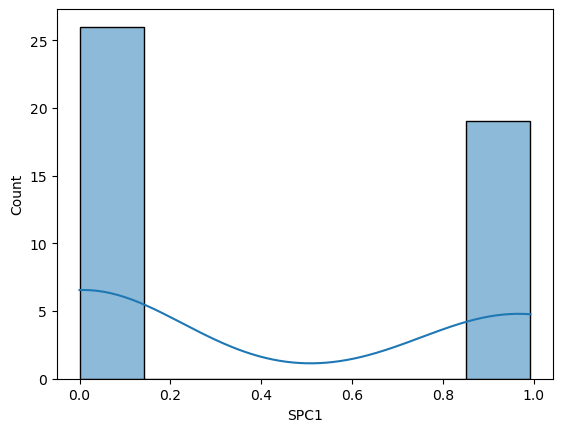

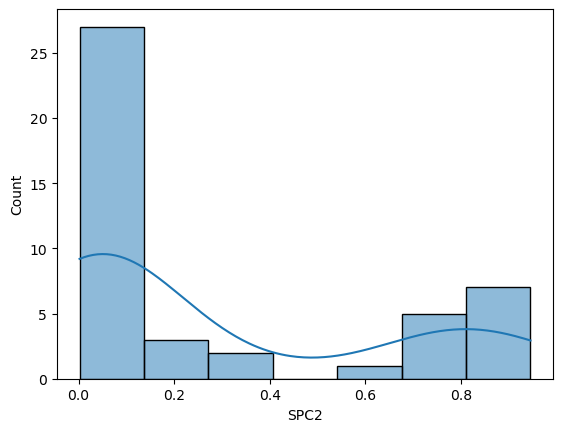

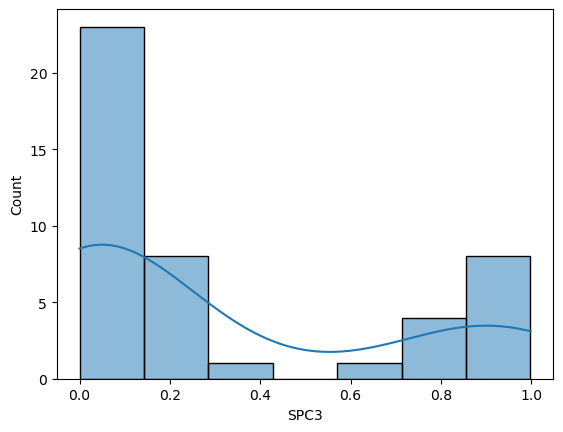

In [5]:
## Ejemplo Curva ROC

## Histograma suavizado de las predicciones

import seaborn as sns
sns.histplot(data=DF_revisión, x="SPC1", kde=True)
plt.show()

import seaborn as sns
sns.histplot(data=DF_revisión, x="SPC2", kde=True)
plt.show()

import seaborn as sns
sns.histplot(data=DF_revisión, x="SPC3", kde=True)
plt.show()
  

In [6]:
modelo_log.predict_proba(X_test)

array([[4.09968736e-03, 8.12343869e-01, 1.83556444e-01],
       [9.41955391e-01, 5.80440292e-02, 5.80204804e-07],
       [1.58411539e-08, 2.09129538e-03, 9.97908689e-01],
       [6.82490449e-03, 7.73251440e-01, 2.19923656e-01],
       [1.59400633e-03, 7.51206020e-01, 2.47199973e-01],
       [9.50040938e-01, 4.99586028e-02, 4.58820735e-07],
       [7.78025523e-02, 9.04144983e-01, 1.80524643e-02],
       [1.79836139e-04, 1.47357789e-01, 8.52462375e-01],
       [2.42255842e-03, 7.80452512e-01, 2.17124929e-01],
       [2.89983325e-02, 9.40818575e-01, 3.01830924e-02],
       [4.73570467e-04, 2.25282349e-01, 7.74244081e-01],
       [9.62693687e-01, 3.73061293e-02, 1.84138561e-07],
       [9.69162370e-01, 3.08375338e-02, 9.66512310e-08],
       [9.56006735e-01, 4.39929994e-02, 2.65383495e-07],
       [9.76521682e-01, 2.34781290e-02, 1.89459181e-07],
       [4.76687163e-03, 6.63398769e-01, 3.31834359e-01],
       [9.67227577e-06, 2.67217823e-02, 9.73268545e-01],
       [2.76880763e-02, 9.45164

In [9]:
1+1

2

In [13]:
DF_revisión['SPC1']

73     4.099687e-03
18     9.419554e-01
118    1.584115e-08
78     6.824904e-03
76     1.594006e-03
31     9.500409e-01
64     7.780255e-02
141    1.798361e-04
68     2.422558e-03
82     2.899833e-02
110    4.735705e-04
12     9.626937e-01
36     9.691624e-01
9      9.560067e-01
19     9.765217e-01
56     4.766872e-03
104    9.672276e-06
69     2.768808e-02
55     8.703647e-03
132    1.938497e-05
29     9.587061e-01
127    1.430407e-03
26     9.562688e-01
128    2.494830e-05
131    1.759669e-06
145    1.097677e-04
108    1.252305e-05
143    5.518780e-06
45     9.609644e-01
30     9.494687e-01
22     9.931988e-01
15     9.806886e-01
65     6.905272e-03
11     9.646495e-01
42     9.825968e-01
146    3.770854e-04
51     7.345580e-03
27     9.641240e-01
4      9.780960e-01
32     9.830599e-01
142    4.128027e-04
85     1.183470e-02
86     3.042471e-03
16     9.817521e-01
10     9.666104e-01
Name: SPC1, dtype: float64

In [15]:
y_test

73     1
18     0
118    2
78     1
76     1
31     0
64     1
141    2
68     1
82     1
110    2
12     0
36     0
9      0
19     0
56     1
104    2
69     1
55     1
132    2
29     0
127    2
26     0
128    2
131    2
145    2
108    2
143    2
45     0
30     0
22     0
15     0
65     1
11     0
42     0
146    2
51     1
27     0
4      0
32     0
142    2
85     1
86     1
16     0
10     0
Name: species, dtype: int32

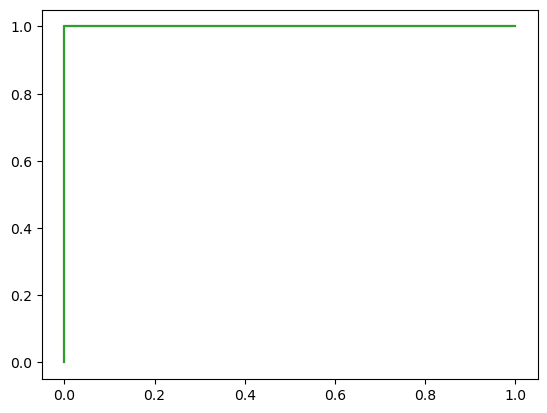

In [22]:
from sklearn.metrics import roc_curve, roc_auc_score
### Curva ROC
y_pred_proba= modelo_log.predict_proba(X_test)

## Curva ROC
## Curva ROC

fpr, tpr, thresholds = roc_curve(y_test, DF_revisión['SPC2'], pos_label=1)
fprr, tprr, thresholdsr = roc_curve(y_test, DF_revisión['SPC1'], pos_label=0)
fprrr, tprrr, thresholdsrr = roc_curve(y_test, DF_revisión['SPC3'], pos_label=2)

plt.plot(fprr, tprr, label='ROC curve versicolor')
plt.plot(fprrr, tprrr, label='ROC curve versicolor')
